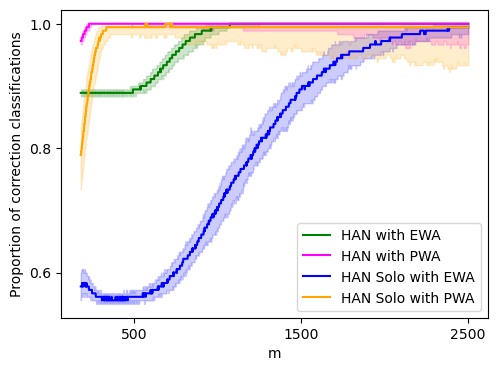

In [3]:
from hansolo import *

M=2502
Nb=100
paq=180
level=0.1
learning="blocs"

plt.figure(figsize=(5.5,4))

legend=['HAN with EWA', 'HAN with PWA', 'HAN Solo with EWA', 'HAN Solo with PWA']
color=['green','magenta','blue','orange']


answers=np.zeros((4,Nb,M))

answers[2,:,:]=np.load(f'saves/EWA_{learning}.npy')
answers[3,:,:]=np.load(f'saves/PWA_{learning}.npy')
answers[0,:,:]=np.load(f'saves/EWA_{learning}_HAN.npy')
answers[1,:,:]=np.load(f'saves/PWA_{learning}_HAN.npy')

for i in range(4):
    Y=np.zeros((Nb,M-paq)) # percentage "glissant" of correct guesses for a bloc of 18 objects
    for nb in range(Nb):
        for m in range(M-paq):
            Y[nb,m]=np.sum(answers[i,nb,m:m+paq])/paq
    Y_med=np.zeros(M-paq)
    Y_90=np.zeros(M-paq)
    Y_10=np.zeros(M-paq)
    Y_max=np.zeros(M-paq)

    for m in range(M-paq):
        X=Y[:,m]
        X=np.sort(X)
        Y_med[m]=X[int(Nb/2)]
        Y_90[m]=X[int(Nb*(1-level))]
        Y_10[m]=X[int(Nb*level)]
        Y_max[m]=X[Nb-1]
   # if Y_10[m] > Y_med[m]:
        #print(m)

    X2=np.arange(M-paq)+paq
    plt.plot(X2,Y_med, label=legend[i], color=color[i])
    plt.fill_between(X2, Y_10, Y_90, color=color[i], alpha=.2)

plt.yticks([0.6,0.8,1])
plt.xticks([500,1500,2500])
plt.ylabel('Proportion of correction classifications')
plt.xlabel('m')

plt.legend()
#plt.savefig('curves.pdf')
plt.show()

